# Spam Mail Prediction 

### Import dependancies

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 535.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.9 MB 14.2 MB/s eta 0:00:01
   ---- ----------------------------------- 1.1/10.9 MB 14.4 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.9 MB 15.9 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/10.9 MB 16.0 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/10.9 MB 15.9 MB/s eta 0:00:01
   -------------- ------------------------- 4.0/10.9 MB 17.1 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/10.9 MB 17.6 MB/s eta 0:00:01
   ---

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
%matplotlib inline

In [6]:
# load the dataset
filename = 'mail_data.csv'
mail_df = pd.read_csv(filename)

In [7]:
# display the first 10 rows of the data
mail_df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\805925\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# check for null values in the data
mail_df.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
# check for information about the data
mail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
mail_df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

Since there are much difference the output of this dataset, It is relevant to reduce the ham data to be equal to spam dataset.


In [13]:
ham = mail_df[mail_df['Category']== 'ham']
spam = mail_df[mail_df['Category']== 'spam']

In [14]:
# print to verify ham rows
ham

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
# print to verify spam rows
spam

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [16]:
ham_sample = ham.sample(n=747)

In [17]:
ham_sample

,Category,Message
2923,ham,I've not sent it. He can send me.
1110,ham,S s..first time..dhoni rocks...
1034,ham,"OH MR SHEFFIELD! You wanna play THAT game, oka..."
554,ham,Ok. Every night take a warm bath drink a cup o...
4654,ham,Lol yes. But it will add some spice to your day.
...,...,...
786,ham,"She was supposed to be but couldn't make it, s..."
2460,ham,Nope. Meanwhile she talk say make i greet you.
2951,ham,Where are you ? You said you would be here whe...
4979,ham,JADE ITS PAUL. Y DIDNT U TXT ME? DO U REMEMBE...


In [18]:
new_df = pd.concat([ham_sample,spam], axis=0)

In [19]:
new_df

,Category,Message
2923,ham,I've not sent it. He can send me.
1110,ham,S s..first time..dhoni rocks...
1034,ham,"OH MR SHEFFIELD! You wanna play THAT game, oka..."
554,ham,Ok. Every night take a warm bath drink a cup o...
4654,ham,Lol yes. But it will add some spice to your day.
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


### Data Preprocessing

In [20]:
# Label Encoder
new_df.loc[new_df['Category']=='spam', 'Category'] = 0
new_df.loc[new_df['Category']=='ham', 'Category'] = 1

spam = 0
ham = 1

In [21]:
X = new_df['Message']
Y = new_df['Category']


In [22]:
# print the X data
print(X)

2923                    I've not sent it. He can send me.
1110                      S s..first time..dhoni rocks...
1034    OH MR SHEFFIELD! You wanna play THAT game, oka...
554     Ok. Every night take a warm bath drink a cup o...
4654     Lol yes. But it will add some spice to your day.
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: Message, Length: 1494, dtype: object


In [23]:
# print the Y data
Y

2923    1
1110    1
1034    1
554     1
4654    1
       ..
5537    0
5540    0
5547    0
5566    0
5567    0
Name: Category, Length: 1494, dtype: object

##### Stemming


In [24]:
por_stem = PorterStemmer()

In [25]:
def stemm(message):
    stemmed_message = re.sub('[^a-zA-Z]', ' ', message)
    stemmed_message = stemmed_message.lower()
    stemmed_message = stemmed_message.split()
    stemmed_message = [por_stem.stem(word) for word in stemmed_message if not word in stopwords.words('english')]
    stemmed_message = ' '.join(stemmed_message)
    return stemmed_message

In [26]:
# apply it to the message column
new_df['Message'] = new_df['Message'].apply(stemm)

In [27]:
new_df

,Category,Message
2923,1,sent send
1110,1,first time dhoni rock
1034,1,oh mr sheffield wanna play game okay boss nann...
554,1,ok everi night take warm bath drink cup milk s...
4654,1,lol ye add spice day
...,...,...
5537,0,want explicit sex sec ring cost p min gsex pob...
5540,0,ask mobil chatlin inclu free min india cust se...
5547,0,contract mobil mnth latest motorola nokia etc ...
5566,0,remind get pound free call credit detail great...


In [28]:
X= new_df['Message']
Y = new_df['Category']
X

2923                                            sent send
1110                                first time dhoni rock
1034    oh mr sheffield wanna play game okay boss nann...
554     ok everi night take warm bath drink cup milk s...
4654                                 lol ye add spice day
                              ...                        
5537    want explicit sex sec ring cost p min gsex pob...
5540    ask mobil chatlin inclu free min india cust se...
5547    contract mobil mnth latest motorola nokia etc ...
5566    remind get pound free call credit detail great...
5567    nd time tri contact u u pound prize claim easi...
Name: Message, Length: 1494, dtype: object

In [29]:
vector = TfidfVectorizer()

In [30]:
vector

TfidfVectorizer()

In [31]:
vector.fit(X)

TfidfVectorizer()

In [32]:
x_vector = vector.transform(X)

In [33]:
print(x_vector)

  (0, 2273)	0.8245884415181982
  (0, 2268)	0.5657330661315361
  (1, 2648)	0.35096248275250935
  (1, 2183)	0.5442397893301419
  (1, 889)	0.4448393129589353
  (1, 646)	0.6186649925899312
  (2, 2865)	0.2372432285411148
  (2, 2303)	0.3225764121902479
  (2, 2072)	0.3225764121902479
  (2, 1923)	0.21080966139742688
  (2, 1793)	0.19570411627497383
  (2, 1784)	0.28377057166003083
  (2, 1779)	0.22723192437138837
  (2, 1694)	0.3225764121902479
  (2, 1655)	0.2932209270618956
  (2, 1006)	0.42161932279485376
  (2, 975)	0.2210231187567889
  (2, 304)	0.3225764121902479
  (3, 2955)	0.2142464288737084
  (3, 2895)	0.29604068328729743
  (3, 2868)	0.27507001050198937
  (3, 2561)	0.18308325902649727
  (3, 2474)	0.19402903424243292
  (3, 2259)	0.18673477636929642
  (3, 1783)	0.18486843191347543
  :	:
  (1492, 1961)	0.3473014097419815
  (1492, 1917)	0.24793029034300007
  (1492, 1776)	0.23179899250594665
  (1492, 1691)	0.27472096935680484
  (1492, 1171)	0.29219275150717056
  (1492, 1052)	0.26412126940357444
  

#### Use OneHot Encoder

In [34]:
new_df

,Category,Message
2923,1,sent send
1110,1,first time dhoni rock
1034,1,oh mr sheffield wanna play game okay boss nann...
554,1,ok everi night take warm bath drink cup milk s...
4654,1,lol ye add spice day
...,...,...
5537,0,want explicit sex sec ring cost p min gsex pob...
5540,0,ask mobil chatlin inclu free min india cust se...
5547,0,contract mobil mnth latest motorola nokia etc ...
5566,0,remind get pound free call credit detail great...


In [35]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x_vector,Y, test_size=0.1, stratify=Y, random_state=2 )

In [36]:
print(y_train.value_counts())

0    672
1    672
Name: Category, dtype: int64


In [37]:
model = RandomForestRegressor()

In [38]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
y_pred = model.predict(X_test)
print(y_pred)

[0.   0.   1.   0.35 1.   0.03 0.   0.   0.95 0.76 0.88 0.   0.   0.08
 1.   0.   0.99 1.   0.42 1.   0.   0.03 1.   0.   1.   0.99 1.   0.57
 1.   1.   0.   0.   1.   1.   0.   0.16 0.   1.   0.73 0.97 0.96 0.
 0.03 1.   0.93 0.   0.   1.   0.   0.   0.38 1.   0.   0.95 1.   1.
 0.42 0.98 0.12 0.   0.   0.   0.96 1.   0.   0.   0.99 0.   0.03 0.12
 1.   0.   1.   1.   0.06 0.9  1.   1.   0.   1.   1.   0.93 1.   0.
 0.   1.   0.78 1.   1.   0.   0.81 0.04 1.   0.   0.   0.   1.   1.
 0.   1.   0.99 1.   0.   0.05 1.   0.   0.06 1.   1.   1.   0.05 0.02
 1.   1.   0.97 0.   0.99 0.   1.   0.   0.1  1.   1.   1.   0.   1.
 1.   0.08 0.07 1.   0.   1.   1.   0.   0.85 0.41 0.   0.04 0.   0.
 0.   1.   0.   1.   0.   0.97 0.   0.   0.   1.  ]


In [40]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.781928


In [44]:
from sklearn.svm import SVC

In [52]:
y_train = np.array(y_train, dtype=np.int32)
model2= SVC()

In [53]:
model2.fit(X_train, y_train)

SVC()

In [54]:
y_pred = model.predict(X_test)
print(y_pred)

[0.   0.   1.   0.35 1.   0.03 0.   0.   0.95 0.76 0.88 0.   0.   0.08
 1.   0.   0.99 1.   0.42 1.   0.   0.03 1.   0.   1.   0.99 1.   0.57
 1.   1.   0.   0.   1.   1.   0.   0.16 0.   1.   0.73 0.97 0.96 0.
 0.03 1.   0.93 0.   0.   1.   0.   0.   0.38 1.   0.   0.95 1.   1.
 0.42 0.98 0.12 0.   0.   0.   0.96 1.   0.   0.   0.99 0.   0.03 0.12
 1.   0.   1.   1.   0.06 0.9  1.   1.   0.   1.   1.   0.93 1.   0.
 0.   1.   0.78 1.   1.   0.   0.81 0.04 1.   0.   0.   0.   1.   1.
 0.   1.   0.99 1.   0.   0.05 1.   0.   0.06 1.   1.   1.   0.05 0.02
 1.   1.   0.97 0.   0.99 0.   1.   0.   0.1  1.   1.   1.   0.   1.
 1.   0.08 0.07 1.   0.   1.   1.   0.   0.85 0.41 0.   0.04 0.   0.
 0.   1.   0.   1.   0.   0.97 0.   0.   0.   1.  ]


In [55]:
score = r2_score(y_test,y_pred)
print(score)

0.781928


In [5]:
# load the dataset
filename = 'combined_data.csv'
df = pd.read_csv(filename)

In [13]:
pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   -- ------------------------------------- 20.5/301.4 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 487.6 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.4 kB 487.6 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.4 kB 490.2 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.2 MB/s eta 0:00:00


In [6]:
df

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB
None


In [15]:
print(df.describe())

              label
count  83448.000000
mean       0.526196
std        0.499316
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


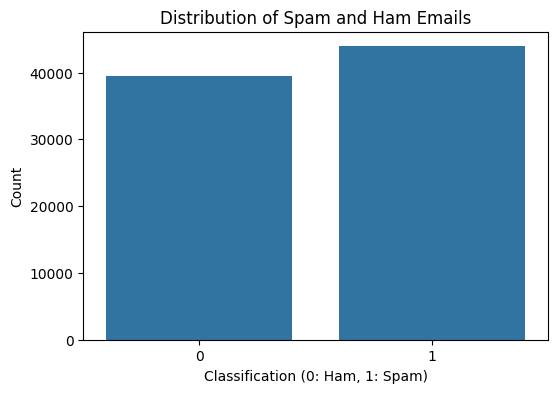

In [16]:
# 2. Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Classification (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

In [22]:
from wordcloud import WordCloud

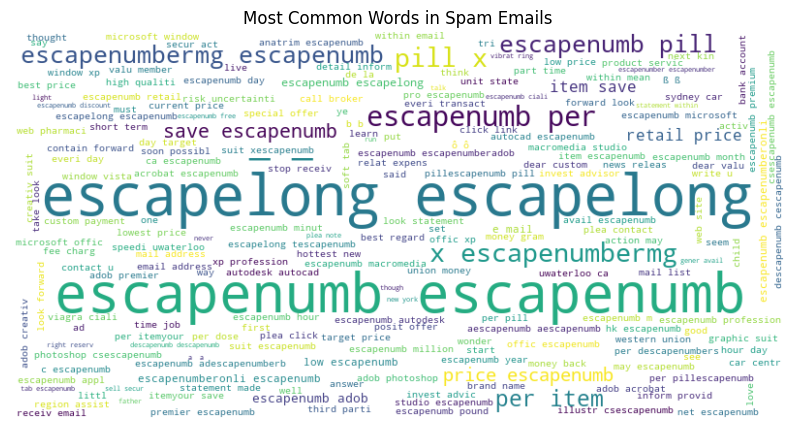

In [24]:
# 3. Visualize the most common words in spam and ham emails
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

spam_text = ' '.join(df[df['label'] == 1]['text'])
ham_text = ' '.join(df[df['label'] == 0]['text'])

generate_wordcloud(spam_text, 'Most Common Words in Spam Emails')


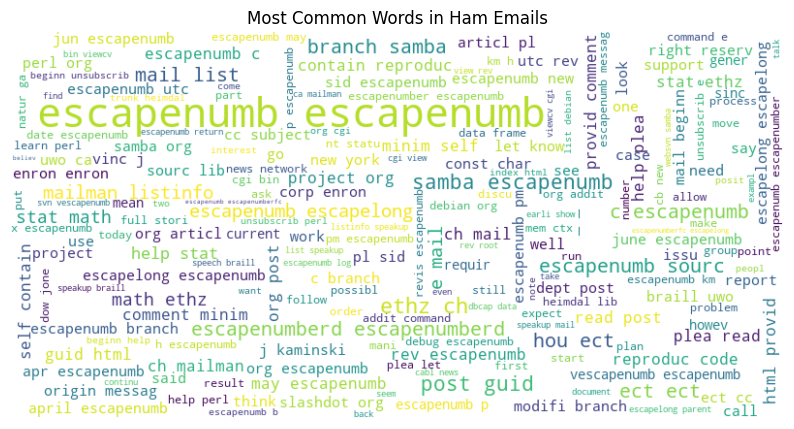

In [25]:
generate_wordcloud(ham_text, 'Most Common Words in Ham Emails')

In [18]:
# 4. Check for any missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
label    0
text     0
dtype: int64


In [19]:
# 5. Explore the length of emails in each class
df['message_length'] = df['text'].apply(len)

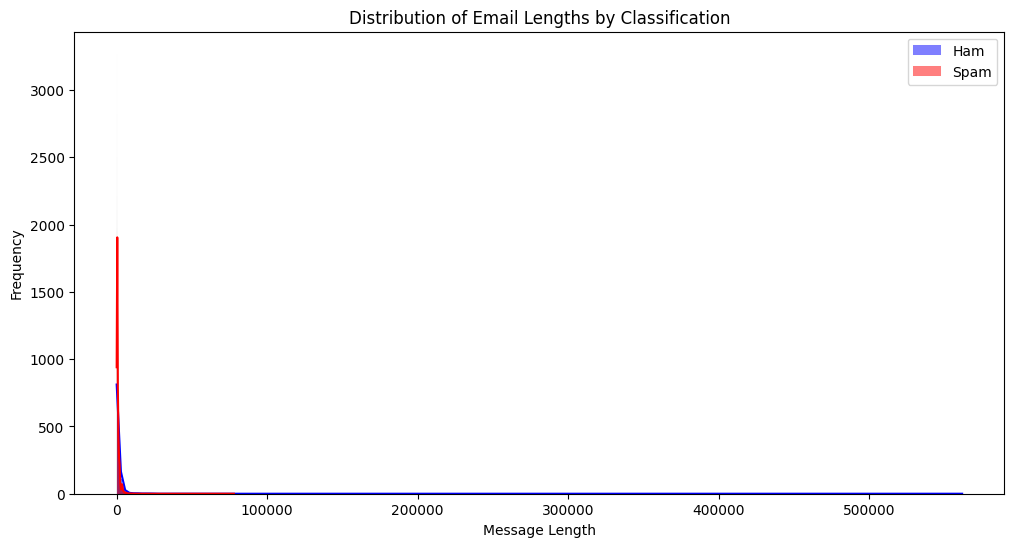

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['message_length'], color='blue', label='Ham', kde=True)
sns.histplot(df[df['label'] == 1]['message_length'], color='red', label='Spam', kde=True)
plt.title('Distribution of Email Lengths by Classification')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [8]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Load NLTK data
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocess data
# df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Combine words back to text
    text = ' '.join(words)
    return text

# Apply preprocessing to the 'message' column
df['text'] = df['text'].apply(preprocess_text)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
def get_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(grams) for grams in n_grams]


In [ ]:
# Get bigrams and trigrams for spam and ham emails
spam_bigrams = df[df['label'] == 1]['processed_message'].apply(lambda x: get_ngrams(x, 2))
spam_trigrams = df[df['label'] == 1]['processed_message'].apply(lambda x: get_ngrams(x, 3))
ham_bigrams = df[df['classification'] == 0]['processed_message'].apply(lambda x: get_ngrams(x, 2))
ham_trigrams = df[df['classification'] == 0]['processed_message'].apply(lambda x: get_ngrams(x, 3))


In [ ]:


# Flatten the lists
spam_bigrams = [item for sublist in spam_bigrams for item in sublist]
spam_trigrams = [item for sublist in spam_trigrams for item in sublist]
ham_bigrams = [item for sublist in ham_bigrams for item in sublist]
ham_trigrams = [item for sublist in ham_trigrams for item in sublist]

# Get the most common bigrams and trigrams
spam_bigram_counts = Counter(spam_bigrams)
spam_trigram_counts = Counter(spam_trigrams)
ham_bigram_counts = Counter(ham_bigrams)
ham_trigram_counts = Counter(ham_trigrams)

# Function to plot most common n-grams
def plot_ngrams(ngram_counts, title):
    ngrams_df = pd.DataFrame(ngram_counts.most_common(20), columns=['ngram', 'count'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='ngram', data=ngrams_df)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('N-gram')
    plt.show()

# Plot the most common bigrams and trigrams for spam and ham emails
plot_ngrams(spam_bigram_counts, 'Most Common Bigrams in Spam Emails')
plot_ngrams(spam_trigram_counts, 'Most Common Trigrams in Spam Emails')
plot_ngrams(ham_bigram_counts, 'Most Common Bigrams in Ham Emails')
plot_ngrams(ham_trigram_counts, 'Most Common Trigrams in Ham Emails')

In [74]:
y_train = y_train.dropna()

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     11818
           1       0.98      0.99      0.99     13217

    accuracy                           0.98     25035
   macro avg       0.98      0.98      0.98     25035
weighted avg       0.98      0.98      0.98     25035



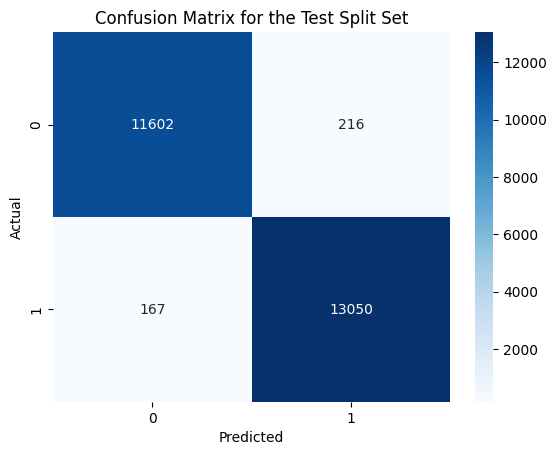

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [76]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test_tfidf)
print("Decision Tree Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classifier
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1448
           1       0.92      0.83      0.87       224

    accuracy                           0.97      1672
   macro avg       0.95      0.91      0.93      1672
weighted avg       0.97      0.97      0.97      1672



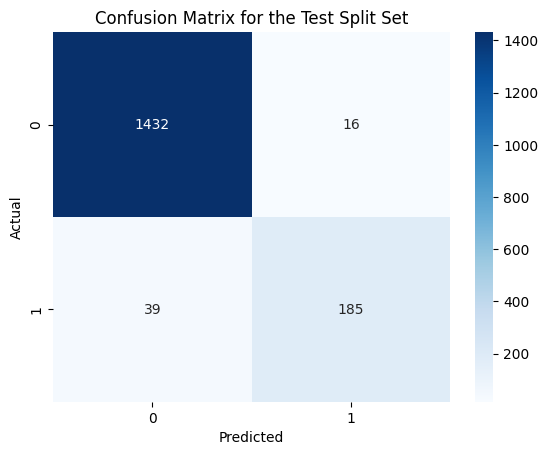

In [81]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [77]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predict and evaluate
y_pred_lstm = (lstm_model.predict(X_test_pad) > 0.5).astype("int32")
print("LSTM Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lstm):.2f}")
print(classification_report(y_test, y_pred_lstm))


Epoch 1/5
98/98 [==============================] - 9s 57ms/step - loss: 0.2515 - accuracy: 0.9160 - val_loss: 0.1231 - val_accuracy: 0.9654
Epoch 2/5
98/98 [==============================] - 5s 50ms/step - loss: 0.0412 - accuracy: 0.9888 - val_loss: 0.0835 - val_accuracy: 0.9808
Epoch 3/5
98/98 [==============================] - 5s 51ms/step - loss: 0.0125 - accuracy: 0.9971 - val_loss: 0.0729 - val_accuracy: 0.9808
Epoch 4/5
98/98 [==============================] - 5s 52ms/step - loss: 0.0062 - accuracy: 0.9990 - val_loss: 0.0934 - val_accuracy: 0.9833
Epoch 5/5
53/53 [==============================] - 1s 7ms/step
LSTM Model
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       1.00      0.91      0.95       224

    accuracy                           0.99      1672
   macro avg       0.99      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



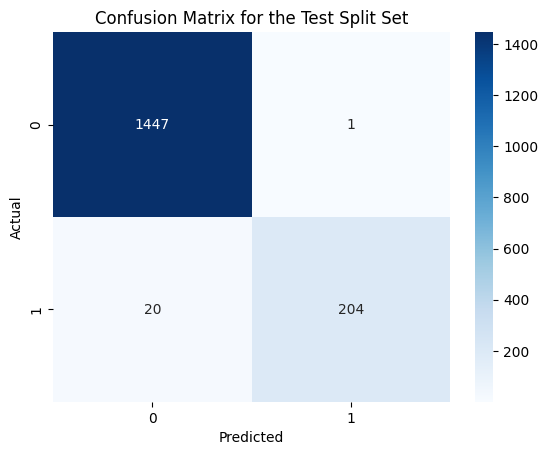

In [82]:
cm = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

# GRU Model
gru_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    GRU(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_model.fit(X_train_pad, y_train, epochs=20,batch_size=32, validation_split=0.2)

# Predict and evaluate
y_pred_gru = (gru_model.predict(X_test_pad) > 0.5).astype("int32")
print("GRU Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gru):.2f}")
print(classification_report(y_test, y_pred_gru))


Epoch 1/5
98/98 [==============================] - 7s 54ms/step - loss: 0.2596 - accuracy: 0.9074 - val_loss: 0.1036 - val_accuracy: 0.9718
Epoch 2/5
98/98 [==============================] - 5s 47ms/step - loss: 0.0332 - accuracy: 0.9917 - val_loss: 0.0769 - val_accuracy: 0.9795
Epoch 3/5
98/98 [==============================] - 5s 51ms/step - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.0817 - val_accuracy: 0.9833
Epoch 4/5
98/98 [==============================] - 5s 49ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0731 - val_accuracy: 0.9808
Epoch 5/5
53/53 [==============================] - 1s 8ms/step
GRU Model
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.99      0.92      0.95       224

    accuracy                           0.99      1672
   macro avg       0.99      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



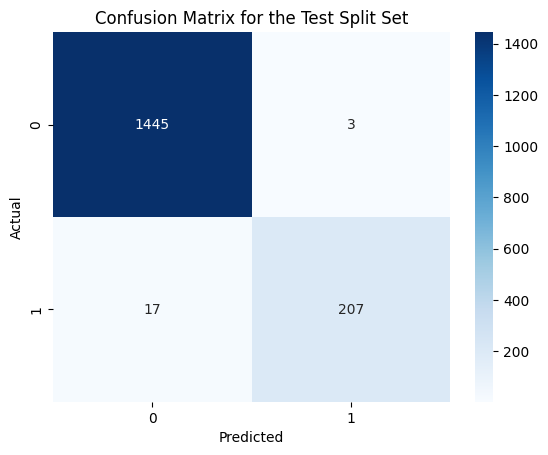

In [83]:
cm = confusion_matrix(y_test, y_pred_gru)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
